<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<ipython-input-5-1a7bed7b3af8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x=media_por_corte.index, y=media_por_corte.values, palette="pastel")


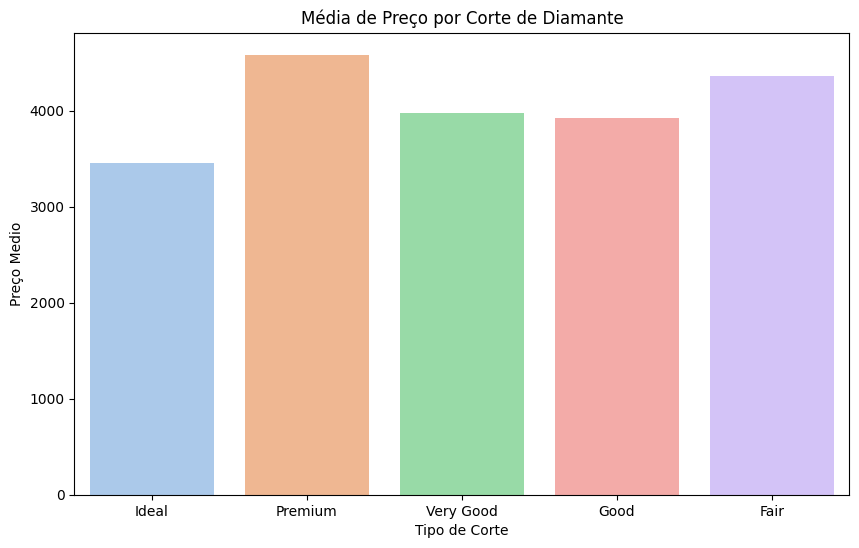

In [5]:
# gráfico do exercício 1

# Calcular a média do preço por corte
media_por_corte = data.groupby("cut")["price"].mean()
# Ordenar os cortes pela média do preço
media_por_corte = media_por_corte.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
grafico = sns.barplot(x=media_por_corte.index, y=media_por_corte.values, palette="pastel")
grafico.set(title='Média de Preço por Corte de Diamante', ylabel='Preço Medio', xlabel='Tipo de Corte')
plt.show() # esconde um monte de informação desnecessaria.




**Insight do gráfico 1**: Os cortes Premium e Fair apresentam as maiores médias de valores por corte. Os cortes Very Good e Good apresentam médias semelhantes, e, por último, o corte Ideal possui o menor preço médio por corte

---

## 2\. Número de passageiros em dezembro por ano

In [28]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


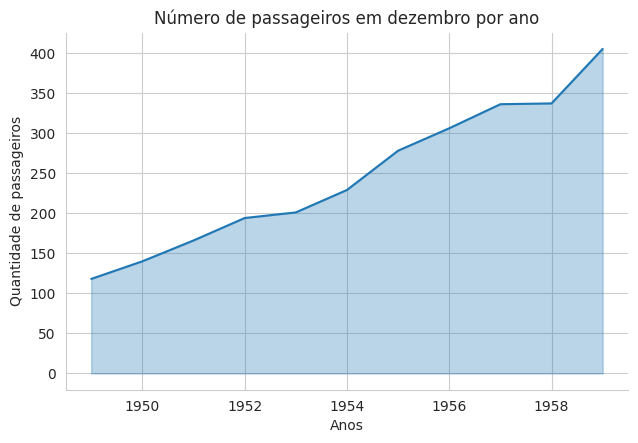

In [54]:
# gráfico do exercício 2
with sns.axes_style('whitegrid'):
  passageiros_por_ano = data[data['month'] == 'Dec'].groupby('year')['passengers'].sum().reset_index()
  flights = sns.FacetGrid(data=passageiros_por_ano, palette="pastel")
  flights.map(sns.lineplot, "year", "passengers")
  flights.map(plt.fill_between, 'year', 'passengers', alpha=0.3)
  flights.set(title='Número de passageiros em dezembro por ano', ylabel='Quantidade de passageiros', xlabel='Anos')
  flights.fig.set_size_inches(w=20/2.54, h=12/2.54)
  plt.show()

**Insight do gráfico 2**: Foi possível reparar que a cada ano que passou, aumentou muito o número de passageiros no período de dezembro.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [8]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<ipython-input-10-d89639bb4f45>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  flights = sns.lineplot(data=passageiros_por_mes, x='month', y='passengers', palette="pastel")


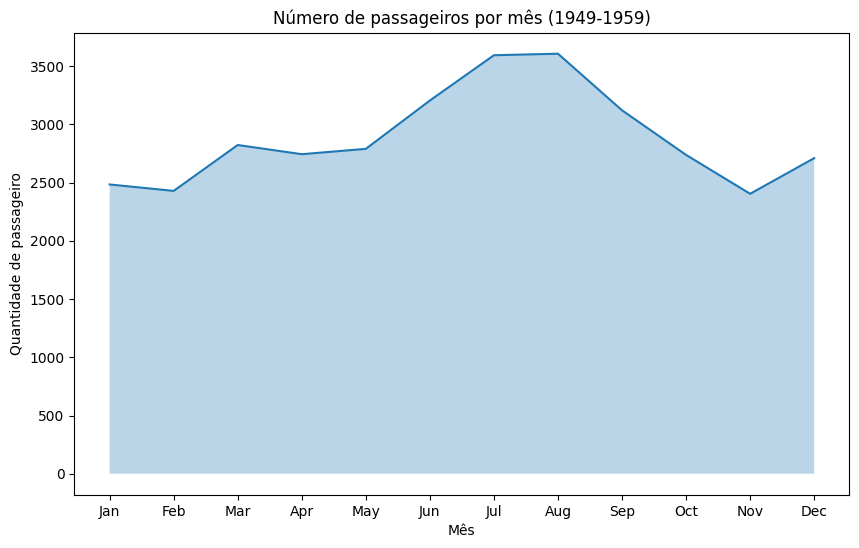

In [10]:

data_filtrada = data[(data['year'] >= 1949) & (data['year'] <= 1959)]

# Agrupar e somar passageiros por mês
passageiros_por_mes = data_filtrada.groupby('month')['passengers'].sum().reset_index()

# Criar o gráfico
plt.figure(figsize=(10, 6))
flights = sns.lineplot(data=passageiros_por_mes, x='month', y='passengers', palette="pastel")
plt.fill_between(passageiros_por_mes['month'], passageiros_por_mes['passengers'], alpha=0.3)
flights.set(title='Número de passageiros por mês (1949-1959)', xlabel='Mês', ylabel='Quantidade de passageiro')
plt.show()

**Insight do gráfico 3**: Ficou claro que, por mês, temos mais de dois mil passageiros e que, no período de junho e julho, há um aumento massivo de passageiros, caindo esse número no início de novembro e tendo uma alta em dezembro.

---